## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Data Exploration

In [2]:
heart_df = pd.read_csv("heart_2020_cleaned.csv")
heart_df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Data Cleaning

### check for missing values

In [3]:
missing_values = heart_df.isnull().sum()
missing_values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
# check for duplicate
heart_duplicate = heart_df[heart_df.duplicated()]
heart_duplicate

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [5]:
#check the total number of missing value
num_of_duplicate = heart_df.duplicated().sum()
num_of_duplicate

18078

### we cannot drop duplicate because they are collation of different people health status and the duplicate records might have a valid information

In [6]:
# check for data type

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
# check the summary of the data

In [9]:
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
# check outliers in dataset

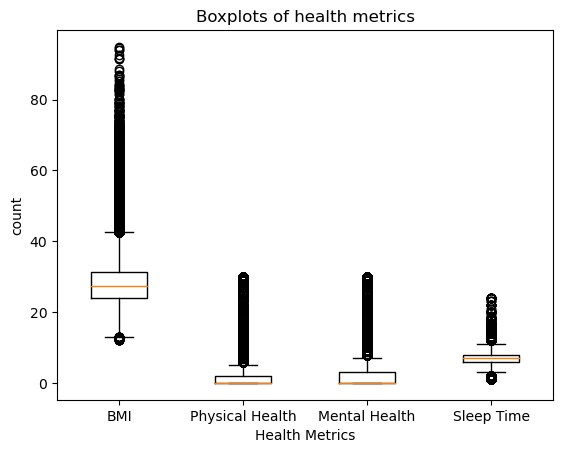

In [11]:
plt.boxplot(heart_df[["BMI","PhysicalHealth","MentalHealth","SleepTime"]])
plt.xticks(ticks=[1, 2, 3, 4], labels=["BMI", "Physical Health", "Mental Health", "Sleep Time"])
plt.xlabel("Health Metrics")
plt.ylabel("count")
plt.title("Boxplots of health metrics")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15180\3873646737.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_15180\3873646737.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_15180\3873646737.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_15180\3873646737.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


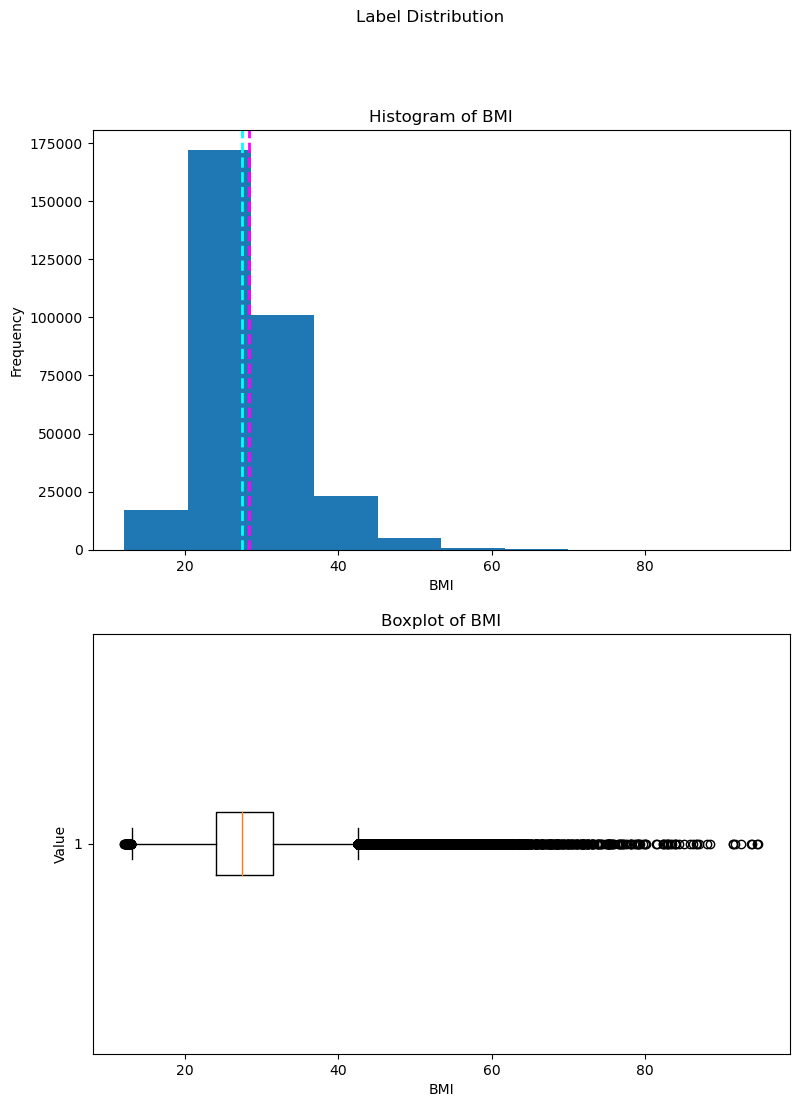

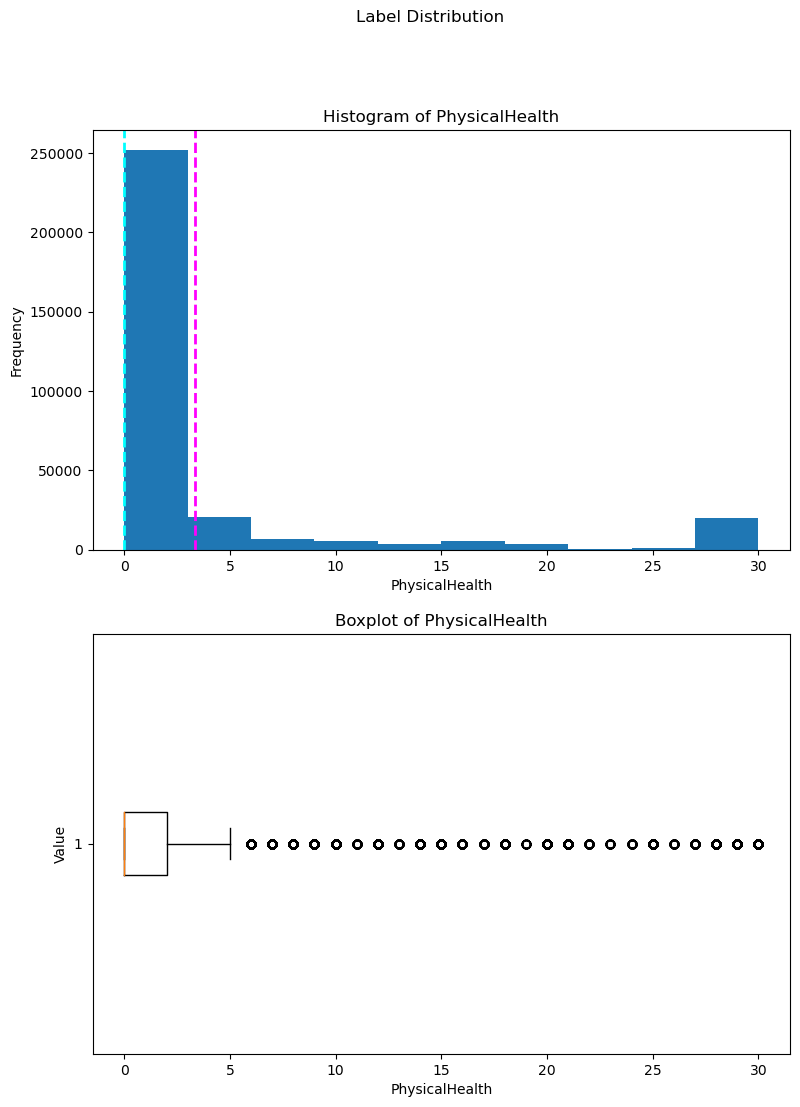

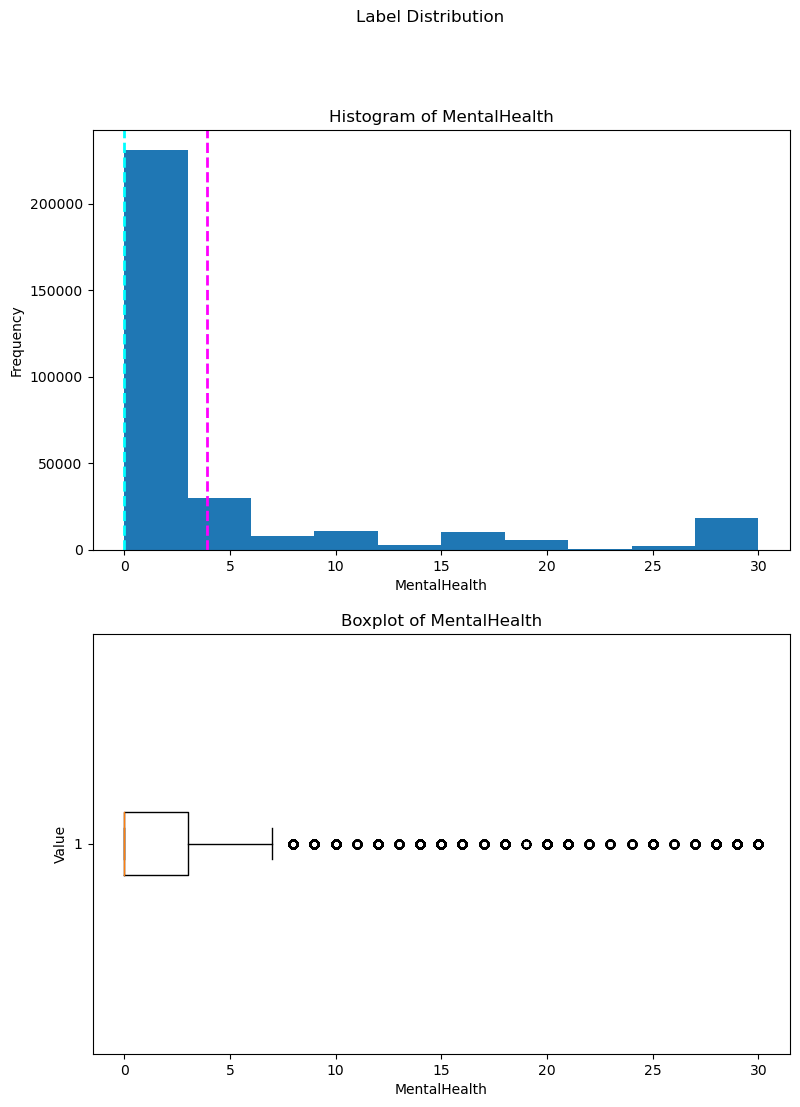

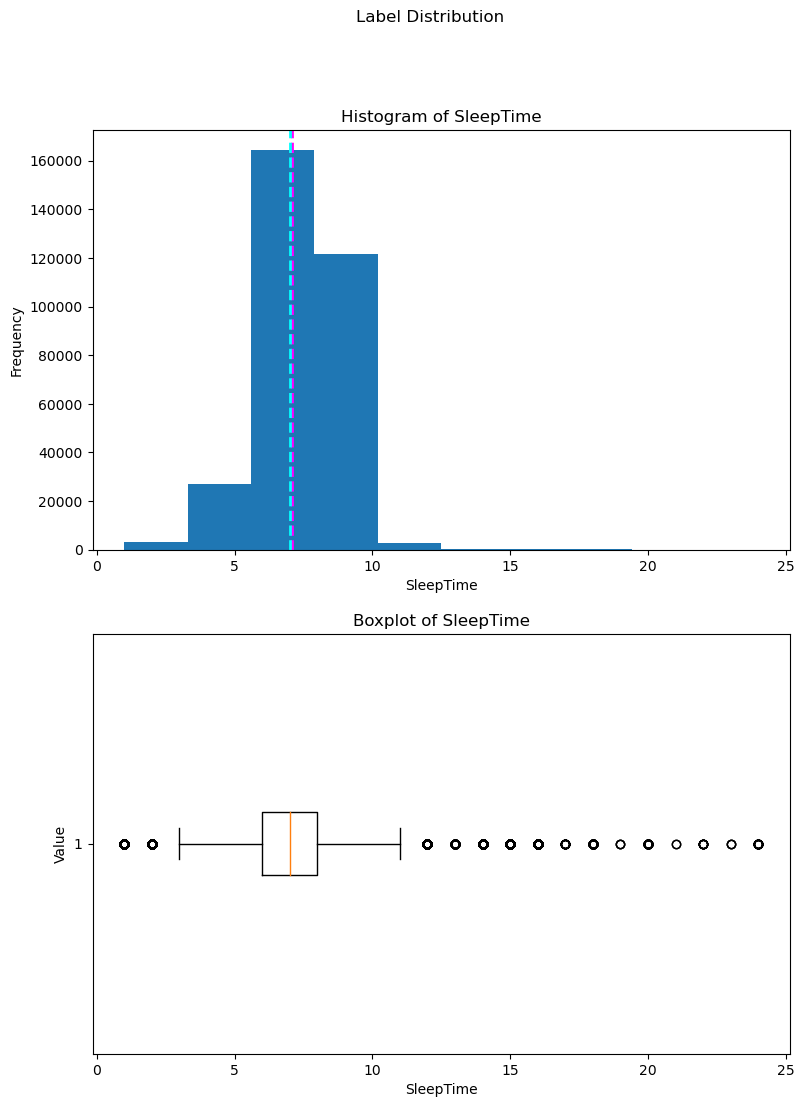

In [12]:


# Specify the column names directly
Label = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

for col in Label:
    # Create a new figure for each column
    fig, ax = plt.subplots(2, 1, figsize=(9, 12))
    
    # Plot histogram
    ax[0].hist(heart_df[col])  # Adjust bins as needed
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Frequency")
    ax[0].set_title("Histogram of " + col)
    ax[0].axvline(heart_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(heart_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)

    # Plot boxplot
    ax[1].boxplot(heart_df[col], vert = False)
    ax[1].set_xlabel(col)
    ax[1].set_ylabel("Value")
    ax[1].set_title("Boxplot of " + col)
    
    fig.suptitle("Label Distribution")  # Adjust layout to prevent overlap of subplots
    fig.show()


In [13]:
BMI_1percentile = heart_df["BMI"].quantile(0.1)
BMI_45percentile =heart_df["BMI"].quantile(0.45)
heart_df = heart_df[heart_df["BMI"] < BMI_45percentile]
heart_df = heart_df[heart_df["BMI"] > BMI_1percentile]

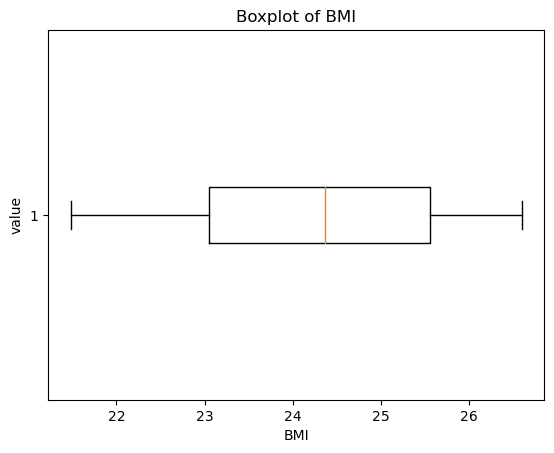

In [14]:
plt.boxplot(heart_df["BMI"], vert = False)
plt.xlabel("BMI")
plt.ylabel("value")
plt.title("Boxplot of BMI")
plt.show()

## Explorator Data Analysis

### Demographic Analysis

In [15]:
column_names = heart_df.columns
column_names 

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [16]:
# What is the distribution of individuals based on their age categories?

In [17]:
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319779,No,23.38,Yes,No,No,30.0,0.0,Yes,Female,70-74,Hispanic,No,Yes,Fair,5.0,No,No,No
319784,No,26.58,Yes,No,No,0.0,0.0,Yes,Male,75-79,Hispanic,No,Yes,Good,6.0,No,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No


In [18]:
heart_df['AgeCategory'].unique()

array(['65-69', '75-79', '40-44', '70-74', '80 or older', '45-49',
       '55-59', '60-64', '50-54', '18-24', '35-39', '25-29', '30-34'],
      dtype=object)

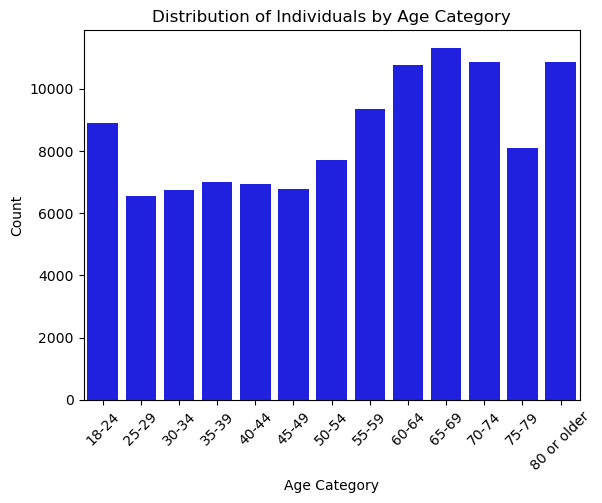

In [19]:
# Calculate age counts and sort the age order
age_order = heart_df["AgeCategory"].value_counts().index.sort_values()
# Create the count plot using Seaborn
sns.countplot(x="AgeCategory", data=heart_df, color="blue", order=age_order)

# Add labels and title
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.title("Distribution of Individuals by Age Category")
plt.xticks(rotation=45)
plt.show()

In [20]:
#How is the dataset distributed in terms of sex (male/female)?

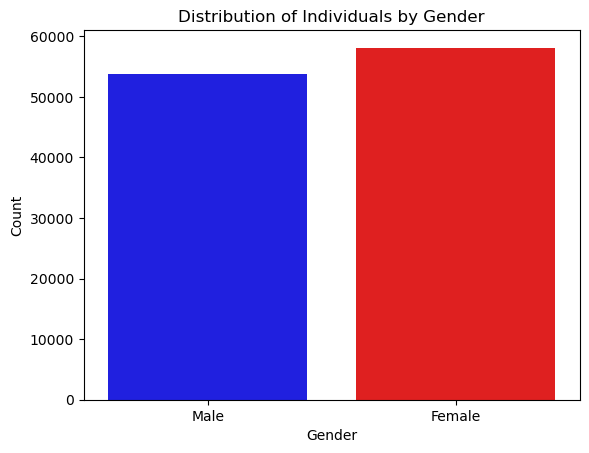

In [21]:
sns.countplot(x="Sex", data = heart_df, palette=["Blue", "Red"])
# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Individuals by Gender")
plt.show()

In [22]:
#What are the different races represented in the dataset?

In [23]:
races = heart_df["Race"].unique()
print(races)

['White' 'Black' 'American Indian/Alaskan Native' 'Hispanic' 'Asian'
 'Other']


# Health Conditions:

In [24]:
# What is the prevalence of heart disease in the dataset?

In [25]:
heartdisease = heart_df.HeartDisease.unique()
heartdisease

array(['No', 'Yes'], dtype=object)

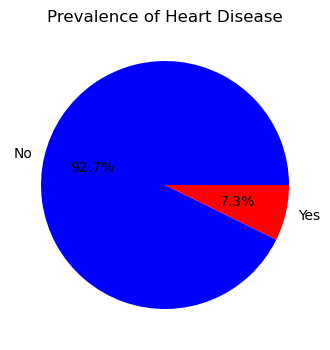

In [26]:
plt.figure(figsize=(4,6))
heart_disease = heart_df['HeartDisease'].value_counts()
plt.pie(heart_disease.values, labels=heart_disease.index,autopct="%1.1f%%", colors=["Blue", "Red"])
plt.title("Prevalence of Heart Disease")
plt.show()

In [27]:
# How many individuals in the dataset are diabetic?
diabetism = heart_df.Diabetic.unique()
diabetism

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [28]:
#clean the data diabetes column
heart_df["Diabetic"] = heart_df["Diabetic"].replace({"Yes (during pregnancy)":"Yes","No, borderline diabetes":"No"})
heart_df["Diabetic"].unique()

array(['Yes', 'No'], dtype=object)

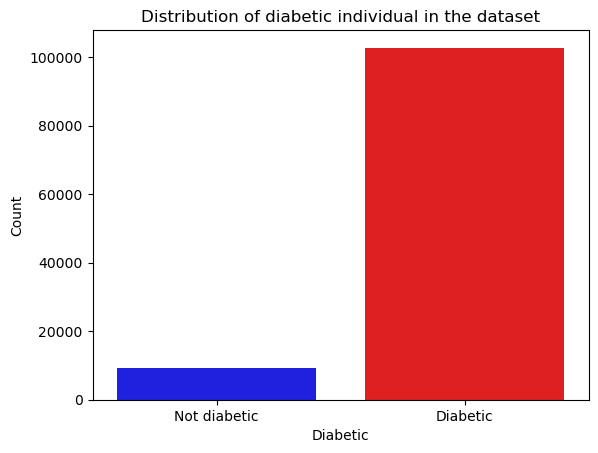

In [29]:

sns.countplot(x="Diabetic", data= heart_df, palette = ["Blue","Red"])
plt.xlabel("Diabetic")
plt.ylabel("Count")
plt.xticks([0,1], labels = ["Not diabetic", "Diabetic"])
plt.title("Distribution of diabetic individual in the dataset")
plt.show()

In [30]:
# What percentage of individuals have a history of stroke?

In [31]:
#check for unique stroke
unique_stroke = heart_df.Stroke.unique()
unique_stroke

array(['No', 'Yes'], dtype=object)

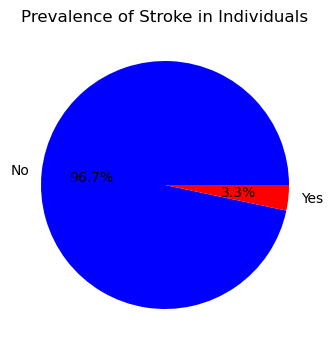

In [32]:
plt.figure(figsize=(4,6))
stroke = heart_df['Stroke'].value_counts()
plt.pie(stroke.values, labels=stroke.index,autopct="%1.1f%%", colors=["Blue", "Red"])
plt.title("Prevalence of Stroke in Individuals")
plt.show()

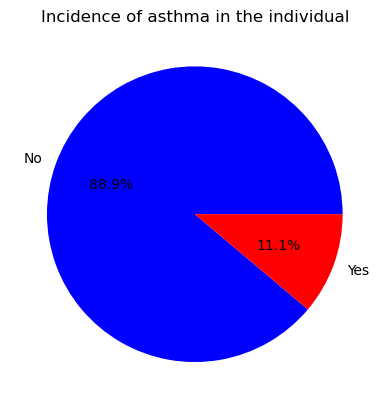

In [33]:
# What is the incidence of asthma in the dataset?
asthma = heart_df["Asthma"].value_counts()
plt.pie(asthma.values,labels=asthma.index, autopct="%1.1f%%", colors=["Blue","Red"])
plt.title("Incidence of asthma in the individual")
plt.show()

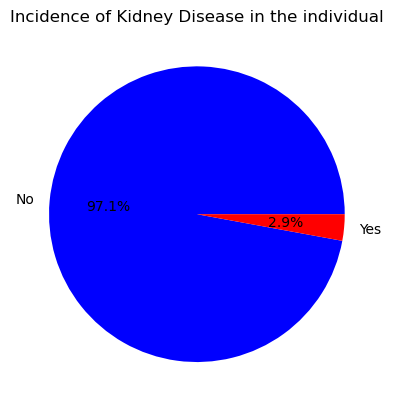

In [34]:
# How many individuals have been diagnosed with kidney disease?
KidneyDisease = heart_df["KidneyDisease"].value_counts()
plt.pie(KidneyDisease.values, labels=KidneyDisease.index, autopct = "%1.1f%%",colors=["Blue","Red"])
plt.title("Incidence of Kidney Disease in the individual")
plt.show()

# Lifestyle factor

In [35]:
# What proportion of individuals engage in smoking and alcohol drinking?
# Count the occurrences of "Yes" in each column
smoking_count = heart_df["Smoking"].value_counts().get("Yes",0) 
drinking_count = heart_df["AlcoholDrinking"].value_counts().get("Yes",0)

In [36]:
total_individuals = len(heart_df)

In [37]:
#calculate the proportion
smoking_proportion = smoking_count/total_individuals
drinking_proportion = drinking_count/total_individuals

In [38]:
# Create labels and proportions list
categories = ["Smoking","AlcoholDrinking"]
proportions = [smoking_proportion, drinking_proportion]

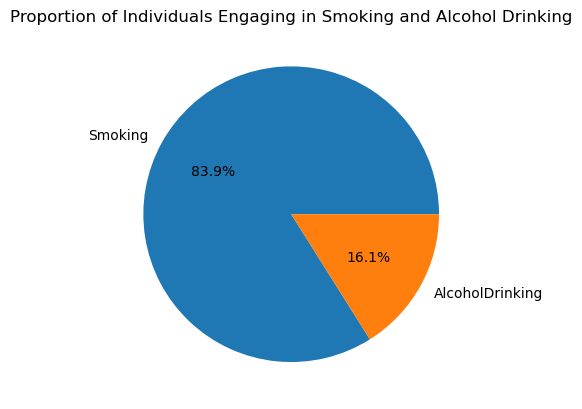

In [39]:
#create a pie chart
plt.pie(proportions, labels=categories, autopct = "%1.1f%%")
plt.title('Proportion of Individuals Engaging in Smoking and Alcohol Drinking')
plt.show()

In [40]:
# How many individuals are physically active based on the provided data?
physical_activity_count = heart_df["PhysicalActivity"].value_counts()

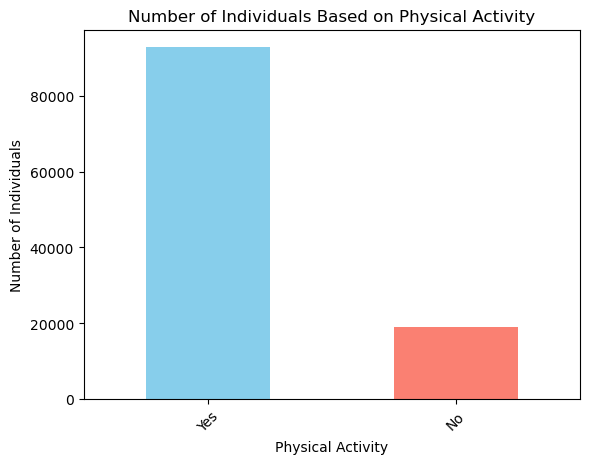

In [41]:
physical_activity_count.plot(kind = "bar", color=["skyblue","salmon"])
plt.title("Number of Individuals Based on Physical Activity")
plt.xlabel("Physical Activity")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=45)
plt.show()

In [42]:
# What is the distribution of BMI (Body Mass Index) in the dataset?

C:\Users\User\AppData\Local\Temp\ipykernel_15180\3763240726.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_df["BMI"],color="Blue", shade = True)


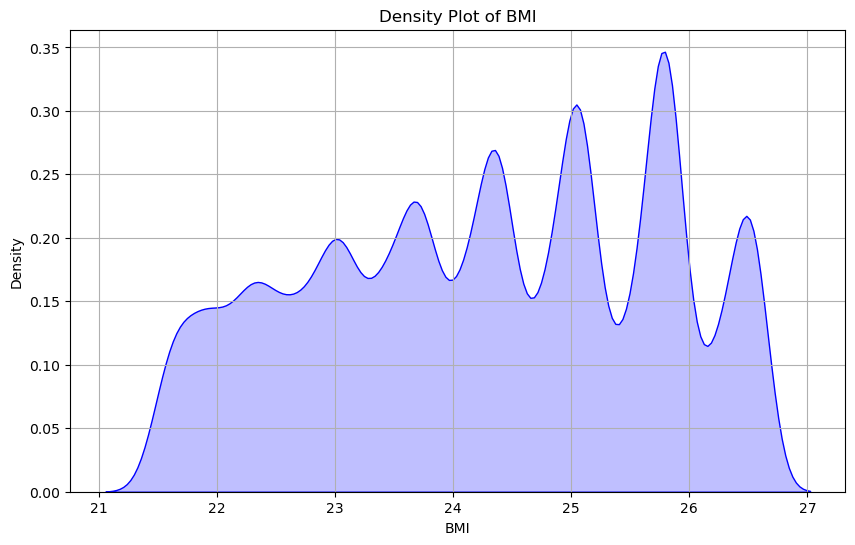

In [43]:
plt.figure(figsize = (10,6))
sns.kdeplot(heart_df["BMI"],color="Blue", shade = True)
plt.xlabel("BMI")
plt.ylabel("Density")
plt.title("Density Plot of BMI")
plt.grid(True)
plt.show()

In [46]:
# Convert 'PhysicalActivity' to numerical format using label encoding
label_encoder = LabelEncoder()
heart_df['PhysicalActivity'] = label_encoder.fit_transform(heart_df['PhysicalActivity'])

# Calculate the correlation coefficient
correlation = heart_df['PhysicalActivity'].corr(heart_df['MentalHealth'])
correlation

-0.07924087827349276

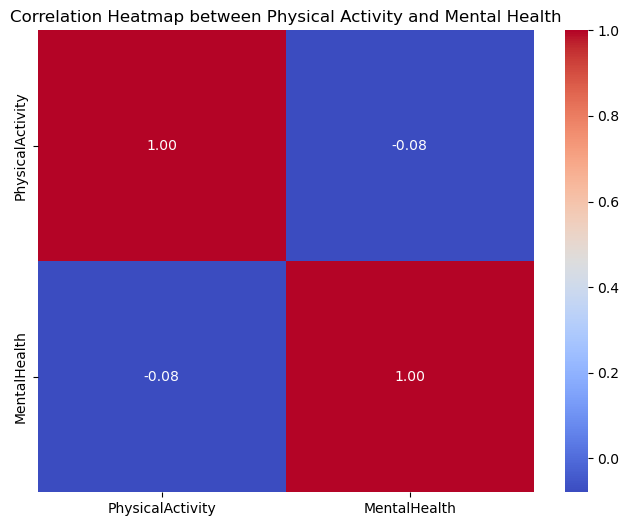

In [48]:
# Is there a correlation between physical activity and mental health?
correlation_matrix =heart_df[['PhysicalActivity', 'MentalHealth']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Physical Activity and Mental Health')
plt.show()


## Physical and Mental Health:

In [49]:
# What is the average physical health score in the dataset?

In [52]:
physical_health_avg =heart_df["PhysicalHealth"].mean()
round(physical_health_avg,2)

2.64

In [53]:
# What is the average mental health score in the dataset?

In [54]:
mental_health_avg =heart_df["MentalHealth"].mean()
round(mental_health_avg,2)

3.43

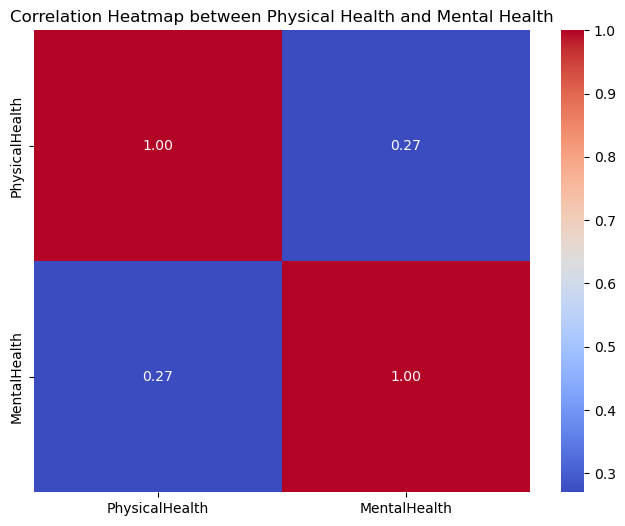

In [55]:
# Is there a relationship between physical health and mental health?
correlation_matrix = heart_df[["PhysicalHealth","MentalHealth"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Physical Health and Mental Health')
plt.show()

## Accessibility and Mobility:

In [56]:
# How many individuals report difficulty walking in the dataset?

In [64]:
walking_difficulty = (heart_df["DiffWalking"] == "Yes").count()
walking_difficulty

111865

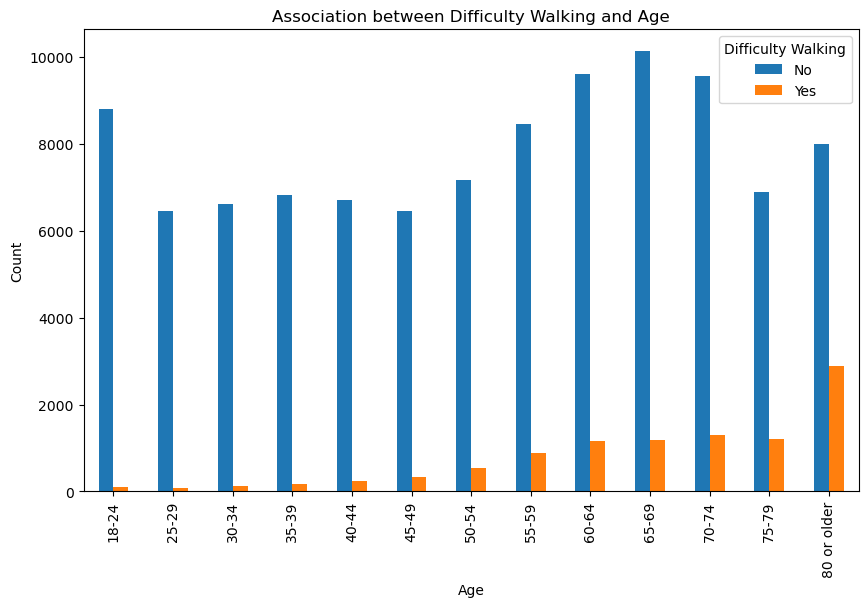

In [66]:
# Is there an association between difficulty walking and age category?

# Plotting a grouped barplot
fig, ax = plt.subplots(figsize=(10, 6))

# Group the DataFrame by 'Age' and 'DiffWalking' and count the occurrences
grouped_data = heart_df.groupby(['AgeCategory', 'DiffWalking']).size().unstack(fill_value=0)

# Plotting the barplot
grouped_data.plot(kind='bar', stacked=False, ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Association between Difficulty Walking and Age')
ax.legend(title='Difficulty Walking')

plt.show()


In [67]:
# Sleep and Lifestyle:

In [68]:
#What is the average sleep time reported by individuals in the dataset?

In [70]:
sleep_time= heart_df["SleepTime"].mean()
round(sleep_time,2)

7.16

In [71]:
# Is there a correlation between sleep time and overall health?

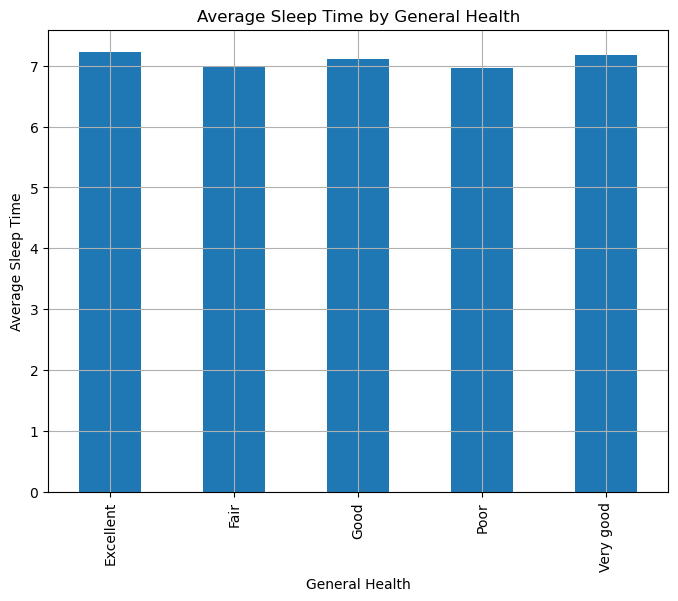

In [76]:
plt.figure(figsize=(8, 6))
heart_df.groupby('GenHealth')['SleepTime'].mean().plot(kind='bar')
plt.xlabel('General Health')
plt.ylabel('Average Sleep Time')
plt.title('Average Sleep Time by General Health')
plt.grid(True)
plt.show()

## General Health Assessment:

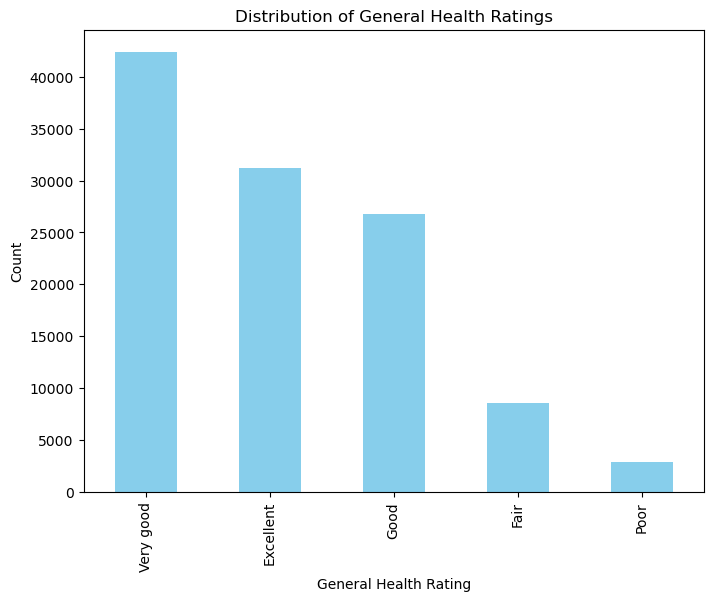

In [77]:
plt.figure(figsize=(8, 6))
heart_df['GenHealth'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('General Health Rating')
plt.ylabel('Count')
plt.title('Distribution of General Health Ratings')
plt.show()

In [78]:
#Are there differences in general health ratings based on sex or age categories?

<Figure size 1000x600 with 0 Axes>

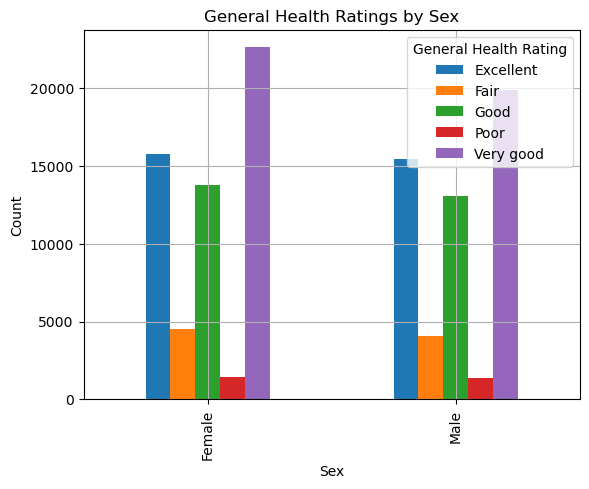

<Figure size 1000x600 with 0 Axes>

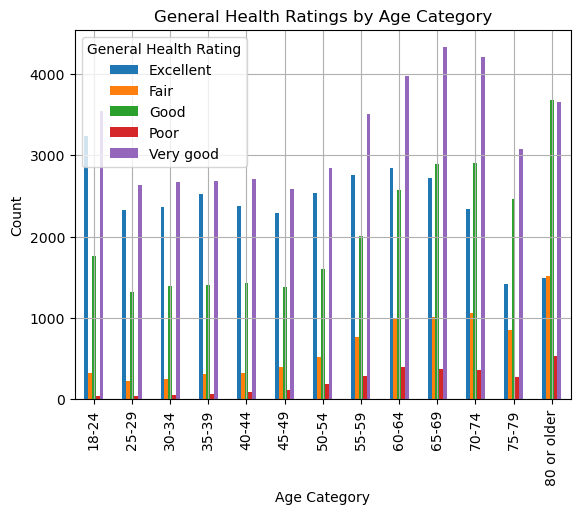

In [79]:
plt.figure(figsize=(10, 6))
heart_df.groupby(['Sex', 'GenHealth']).size().unstack(fill_value=0).plot(kind='bar', stacked=False)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('General Health Ratings by Sex')
plt.grid(True)
plt.legend(title='General Health Rating')
plt.show()

# Grouped bar plot based on age category
plt.figure(figsize=(10, 6))
heart_df.groupby(['AgeCategory', 'GenHealth']).size().unstack(fill_value=0).plot(kind='bar', stacked=False)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('General Health Ratings by Age Category')
plt.grid(True)
plt.legend(title='General Health Rating')
plt.show()

##  Skin Health

In [81]:
# How many individuals have been diagnosed with skin cancer?

In [82]:
skin_cancer_count = (heart_df['SkinCancer'] == 'Yes').sum()
skin_cancer_count

11393